In [58]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import Affine
from rasterio.enums import Resampling
import pandas as pd
from scipy.optimize import curve_fit
import math

from cmcrameri import cm

In [59]:
def numpy2tif(outfile, data, crs, transform, nodata=9999):
    outds = rasterio.open(outfile, 'w', driver='GTiff', 
                  height = data.shape[0], 
                  width = data.shape[1], 
                  count=1, 
                  crs = crs, 
                  dtype = data.dtype,
                  transform = transform,
                  compress='lzw',
                  nodata = nodata)
    outds.write(data, 1)
    outds.close()
    
def tif2numpy(file):
    in_ds = rasterio.open(file)
    data = in_ds.read()
    return data

In [60]:
path = "/home/iganesh/GVDR/Sudenitsa/"
east1 = tif2numpy(path+"sud_east1.tif")
east2 = tif2numpy(path+"sud_east2.tif")
cen_east = tif2numpy(path+"sud_centereast.tif")
cen_west = tif2numpy(path+"sud_centerwest.tif")
arc1 = tif2numpy(path+"sud_arc1.tif")
arc2 = tif2numpy(path+"sud_arc2.tif")
arc3 = tif2numpy(path+"sud_arc3.tif")

In [61]:
path1 = "/home/iganesh/GVDR/Tessera_clips/"
zirka_north = tif2numpy(path1+"zirka_north1.tif")
zirka_south1 = tif2numpy(path1+"zirka_south1.tif")
zirka_south2 = tif2numpy(path1+"zirka_south2.tif")
zirka_south3 = tif2numpy(path1+"zirka_south3.tif")
nedolya_north = tif2numpy(path1+"nedolya_north.tif")
nedolya_south = tif2numpy(path1+"nedolya_south.tif")
dolya_north = tif2numpy(path1+"dolya_north.tif")
dolya_sw = tif2numpy(path1+"dolya_sw.tif")
dolya_se = tif2numpy(path1+"dolya_se.tif")

zirka_north_bsc = tif2numpy(path1+"zirka_north1_bsc.tif")
zirka_south1_bsc = tif2numpy(path1+"zirka_south1_bsc.tif")
zirka_south2_bsc = tif2numpy(path1+"zirka_south2_bsc.tif")
zirka_south3_bsc = tif2numpy(path1+"zirka_south3_bsc.tif")
nedolya_north_bsc = tif2numpy(path1+"nedolya_north_bsc.tif")
nedolya_south_bsc = tif2numpy(path1+"nedolya_south_bsc.tif")
dolya_north_bsc = tif2numpy(path1+"dolya_north_bsc.tif")
dolya_sw_bsc = tif2numpy(path1+"dolya_sw_bsc.tif")
dolya_se_bsc = tif2numpy(path1+"dolya_se_bsc.tif")

zirka_north_inc = tif2numpy(path1+"zirka_north1_inc.tif")
zirka_south1_inc = tif2numpy(path1+"zirka_south1_inc.tif")
zirka_south2_inc = tif2numpy(path1+"zirka_south2_inc.tif")
zirka_south3_inc = tif2numpy(path1+"zirka_south3_inc.tif")
nedolya_north_inc = tif2numpy(path1+"nedolya_north_inc.tif")
nedolya_south_inc = tif2numpy(path1+"nedolya_south_inc.tif")
dolya_north_inc = tif2numpy(path1+"dolya_north_inc.tif")
dolya_sw_inc = tif2numpy(path1+"dolya_sw_inc.tif")
dolya_se_inc = tif2numpy(path1+"dolya_se_inc.tif")

In [62]:
east1_bsc = tif2numpy(path+"sud_east1_bsc.tif")
east2_bsc = tif2numpy(path+"sud_east2_bsc.tif")
cen_east_bsc = tif2numpy(path+"sud_centereast_bsc.tif")
cen_west_bsc = tif2numpy(path+"sud_centerwest_bsc.tif")
arc1_bsc = tif2numpy(path+"sud_arc1_bsc.tif")
arc2_bsc = tif2numpy(path+"sud_arc2_bsc.tif")
arc3_bsc = tif2numpy(path+"sud_arc3_bsc.tif")

In [63]:
east1_inc = tif2numpy(path+"sud_east1_inc.tif")
east2_inc = tif2numpy(path+"sud_east2_inc.tif")
cen_east_inc = tif2numpy(path+"sud_centereast_inc.tif")
cen_west_inc = tif2numpy(path+"sud_centerwest_inc.tif")
arc1_inc = tif2numpy(path+"sud_arc1_inc.tif")
arc2_inc = tif2numpy(path+"sud_arc2_inc.tif")
arc3_inc = tif2numpy(path+"sud_arc3_inc.tif")

In [64]:
## mean and stdev for SAR data
mean_east1_bsc = np.nanmean(east1_bsc)
mean_east2_bsc = np.nanmean(east2_bsc)
mean_cen_east_bsc = np.nanmean(cen_east_bsc)
mean_cen_west_bsc = np.nanmean(cen_west_bsc)
mean_arc1_bsc = np.nanmean(arc1_bsc)
mean_arc2_bsc = np.nanmean(arc2_bsc)
mean_arc3_bsc = np.nanmean(arc3_bsc)

mean_zn1_bsc = np.nanmean(zirka_north_bsc, axis = (1,2))[0:n]
mean_zs1_bsc = np.nanmean(zirka_south1_bsc, axis = (1,2))[0:n]
mean_zs2_bsc = np.nanmean(zirka_south2_bsc, axis = (1,2))[0:n]
mean_zs3_bsc = np.nanmean(zirka_south3_bsc, axis = (1,2))[0:n]
mean_nn_bsc = np.nanmean(nedolya_north_bsc, axis = (1,2))[0:n]
mean_ns_bsc = np.nanmean(nedolya_south_bsc, axis = (1,2))[0:n]
mean_dn_bsc = np.nanmean(dolya_north_bsc, axis = (1,2))[0:n]
mean_dse_bsc = np.nanmean(dolya_se_bsc, axis = (1,2))[0:n]
mean_dsw_bsc = np.nanmean(dolya_sw_bsc, axis = (1,2))[0:n]

mean_east1_inc = np.nanmean(east1_inc)
mean_east2_inc = np.nanmean(east2_inc)
mean_cen_east_inc = np.nanmean(cen_east_inc)
mean_cen_west_inc = np.nanmean(cen_west_inc)
mean_arc1_inc = np.nanmean(arc1_inc)
mean_arc2_inc = np.nanmean(arc2_inc)
mean_arc3_inc = np.nanmean(arc3_inc)

mean_zn1_inc = np.nanmean(zirka_north_inc, axis = (1,2))[0:n]
mean_zs1_inc = np.nanmean(zirka_south1_inc, axis = (1,2))[0:n]
mean_zs2_inc = np.nanmean(zirka_south2_inc, axis = (1,2))[0:n]
mean_zs3_inc = np.nanmean(zirka_south3_inc, axis = (1,2))[0:n]
mean_nn_inc = np.nanmean(nedolya_north_inc, axis = (1,2))[0:n]
mean_ns_inc = np.nanmean(nedolya_south_inc, axis = (1,2))[0:n]
mean_dn_inc = np.nanmean(dolya_north_inc, axis = (1,2))[0:n]
mean_dse_inc = np.nanmean(dolya_se_inc, axis = (1,2))[0:n]
mean_dsw_inc = np.nanmean(dolya_sw_inc, axis = (1,2))[0:n]

In [65]:
## using only the first n rcs values
n = 9
## calculating mean for gvdr data
mean_east1 = np.mean(east1, axis = (1,2))[0:n]
mean_east2 = np.mean(east2, axis = (1,2))[0:n]
mean_cen_east = np.mean(cen_east, axis = (1,2))[0:n]
mean_cen_west = np.mean(cen_west, axis = (1,2))[0:n]
mean_arc1 = np.mean(arc1, axis = (1,2))[0:n]
mean_arc2 = np.mean(arc2, axis = (1,2))[0:n]
mean_arc3 = np.mean(arc3, axis = (1,2))[0:n]

mean_zn1 = np.mean(zirka_north, axis = (1,2))[0:n]
mean_zs1 = np.mean(zirka_south1, axis = (1,2))[0:n]
mean_zs2 = np.mean(zirka_south2, axis = (1,2))[0:n]
mean_zs3 = np.mean(zirka_south3, axis = (1,2))[0:n]
mean_nn = np.mean(nedolya_north, axis = (1,2))[0:n]
mean_ns = np.mean(nedolya_south, axis = (1,2))[0:n]
mean_dn = np.mean(dolya_north, axis = (1,2))[0:n]
mean_dse = np.mean(dolya_se, axis = (1,2))[0:n]
mean_dsw = np.mean(dolya_sw, axis = (1,2))[0:n]

In [66]:
## calculating standard deviation for std data
std_east1 = np.std(east1, axis = (1,2))
std_east2 = np.std(east2, axis = (1,2))
std_cen_east = np.std(cen_east, axis = (1,2))
std_cen_west = np.std(cen_west, axis = (1,2))
std_arc1 = np.std(arc1, axis = (1,2))
std_arc2 = np.std(arc2, axis = (1,2))
std_arc3 = np.std(arc3, axis = (1,2))

In [67]:
# ## adding sar data to gvdr data
# mean_east1 = np.append(10*np.log10(mean_east1), mean_east1_bsc)
# mean_east2 = np.append(10*np.log10(mean_east2), mean_east2_bsc)
# mean_cen_east = np.append(10*np.log10(mean_cen_east), mean_cen_east_bsc)
# mean_cen_west = np.append(10*np.log10(mean_cen_west), mean_cen_west_bsc)
# mean_arc1 = np.append(10*np.log10(mean_arc1), mean_arc1_bsc)
# mean_arc2 = np.append(10*np.log10(mean_arc2), mean_arc2_bsc)
# mean_arc3 = np.append(10*np.log10(mean_arc3), mean_arc3_bsc)

In [68]:
print(mean_zs1_bsc)

[-10.770732]


In [69]:
## adding sar data to gvdr data; raising the rcs from anf data to 10 to convert to dB
mean_east1 = np.append(10**(mean_east1), mean_east1_bsc)
mean_east2 = np.append(10**(mean_east2), mean_east2_bsc)
mean_cen_east = np.append(10**(mean_cen_east), mean_cen_east_bsc)
mean_cen_west = np.append(10**(mean_cen_west), mean_cen_west_bsc)
mean_arc1 = np.append(10**(mean_arc1), mean_arc1_bsc)
mean_arc2 = np.append(10**(mean_arc2), mean_arc2_bsc)
mean_arc3 = np.append(10**(mean_arc3), mean_arc3_bsc)

mean_zn1 = np.append(10**(mean_zn1), mean_zn1_bsc)
mean_zs1 = np.append(10**(mean_zs1), mean_zs1_bsc)
mean_zs2 = np.append(10**(mean_zs2), mean_zs2_bsc)
mean_zs3 = np.append(10**(mean_zs3), mean_zs3_bsc)
mean_nn = np.append(10**(mean_nn), mean_nn_bsc)
mean_ns = np.append(10**(mean_ns), mean_ns_bsc)
mean_dn = np.append(10**(mean_dn), mean_dn_bsc)
mean_dsw = np.append(10**(mean_dsw), mean_dsw_bsc)
mean_dse = np.append(10**(mean_dse), mean_dse_bsc)

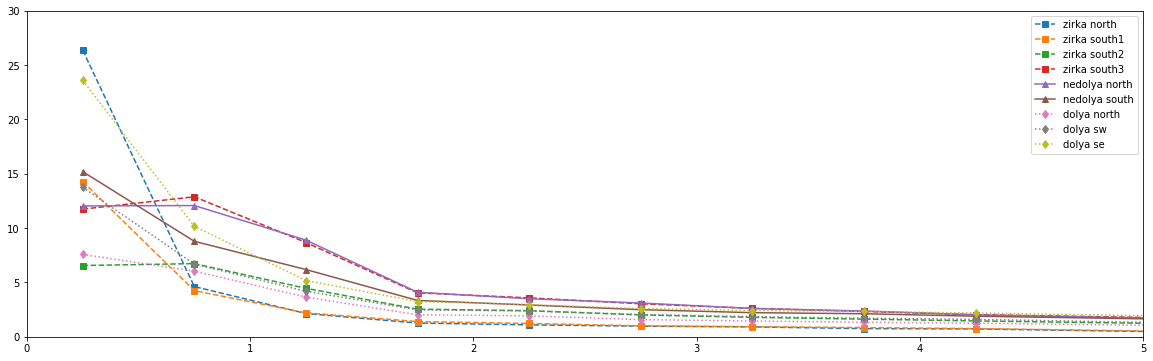

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
cmap = cm.hawaii

# creating a theta_i range with n+ 1 values and then substituting the last values for SAR theta_i
theta_i = np.arange(0.25, 10.25+0.25, 0.5)[0:n+1]
# theta_i[-1] = mean_east1_inc
# ax.plot(theta_i, mean_east1,  "o-", label = "east")

# theta_i[-1] = mean_east2_inc
# ax.plot(theta_i, mean_east2,  "o-", label = "east")

# theta_i[-1] = mean_cen_east_inc
# ax.plot(theta_i, mean_cen_east, "o-", label = "center east")

# theta_i[-1] = mean_cen_west_inc
# ax.plot(theta_i, mean_cen_west,  "o-", label = "center west")

# theta_i[-1] = mean_arc1_inc
# ax.plot(theta_i, mean_arc1,  "o-", label = "west arc")

# theta_i[-1] = mean_arc2_inc
# ax.plot(theta_i, mean_arc2, "o-", label = "west arc")

# theta_i[-1] = mean_arc3_inc
# ax.plot(theta_i, mean_arc3,  "o-", label = "west arc")

theta_i[-1] = mean_zn1_inc
ax.plot(theta_i, mean_zn1, "s--", label = "zirka north")

theta_i[-1] = mean_zs1_inc
ax.plot(theta_i, mean_zs1, "s--", label = "zirka south1")

theta_i[-1] = mean_zs2_inc
ax.plot(theta_i, mean_zs2, "s--", label = "zirka south2")

theta_i[-1] = mean_zs3_inc
ax.plot(theta_i, mean_zs3, "s--", label = "zirka south3")

# theta_i[-1] = mean_nn_inc
ax.plot(theta_i, mean_nn, "^-", label = "nedolya north")

theta_i[-1] = mean_ns_inc
ax.plot(theta_i, mean_ns, "^-", label = "nedolya south")

# theta_i[-1] = mean_dn_inc
ax.plot(theta_i, mean_dn, "d:", label = "dolya north")

theta_i[-1] = mean_dsw_inc
ax.plot(theta_i, mean_dsw, "d:", label = "dolya sw")

theta_i[-1] = mean_dse_inc
ax.plot(theta_i, mean_dse, "d:", label = "dolya se")

plt.xlim(0,5)
plt.ylim(0, 30)
plt.legend()
plt.show()

In [ ]:
min_prad = [6053.66, 6054.05, 6053.98, 6050.43, 6050.67, 6052.29, 6051.79]
max_prad = [6054.62, 6055.01, 6056.41, 6058.55, 6054.28, 6053.94, 6053.11]
mean_prad = [6054.23, 6054.64, 6055.22, 6055.30, 6052.5, 6053.26, 6052.54]
std_prad = [0.23, 0.19, 0.40, 0.89, 0.38, 0.31, 0.17]

In [ ]:
theta_i = np.arange(0.25, 10.25+0.25, 0.5)[0:11]
print(theta_i)